In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://hbc47390:YZ605BEjHe4jzYuX@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB?security=SSL

In [3]:
# How many rows of data are in the dataset
%sql SELECT COUNT(*) FROM CHICAGO_DATA;

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


1
78


In [15]:
# Retrieving column data from database table
%sql select * from CHICAGO_DATA limit 3;

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20


In [16]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CHICAGO_DATA'

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


colname,typename,length
CA,SMALLINT,2
COMMUNITY_AREA_NAME,VARCHAR,22
PERCENT_OF_HOUSING_CROWDED,DECIMAL,4
PERCENT_HOUSEHOLDS_BELOW_POVERTY,DECIMAL,4
PERCENT_AGED_16_UNEMPLOYED,DECIMAL,4
PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,DECIMAL,4
PERCENT_AGED_UNDER_18_OR_OVER_64,DECIMAL,4
PER_CAPITA_INCOME_,INTEGER,4
HARDSHIP_INDEX,SMALLINT,2


In [19]:
# Number of community ares in chicago with a hardship index greater than 50.0
%sql select count(*) COMMUNITY_AREA_NAME from CHICAGO_DATA where HARDSHIP_INDEX > 50.0;

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


community_area_name
38


In [20]:
# Maximum value of hardship index in this dataset
%sql select max(HARDSHIP_INDEX) from CHICAGO_DATA;

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


1
98


In [24]:
# Community area with the highest hardship index
%sql select COMMUNITY_AREA_NAME from CHICAGO_DATA where HARDSHIP_INDEX = (select max(HARDSHIP_INDEX) from CHICAGO_DATA); 

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


community_area_name
Riverdale


In [29]:
# Community areas with per-capita incomes greater than $60,000
%sql select COMMUNITY_AREA_NAME from CHICAGO_DATA where PER_CAPITA_INCOME_ > 60000;

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


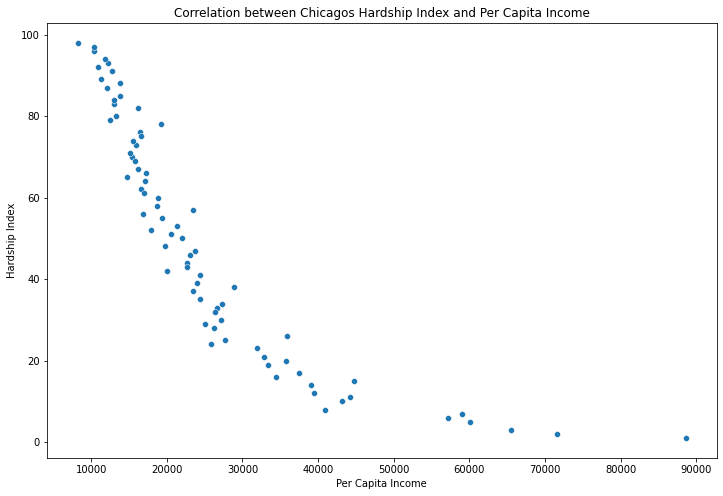

In [35]:
# Scatter plot using the variables `per_capita_income_` and `hardship_index`.
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM CHICAGO_DATA;

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
ax.set(xlabel='Per Capita Income', ylabel='Hardship Index', title='Correlation between Chicagos Hardship Index and Per Capita Income')
plt.show()

##### You can see that as  Chicago's Per Capita Income rises the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.

 * ibm_db_sa://hbc47390:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


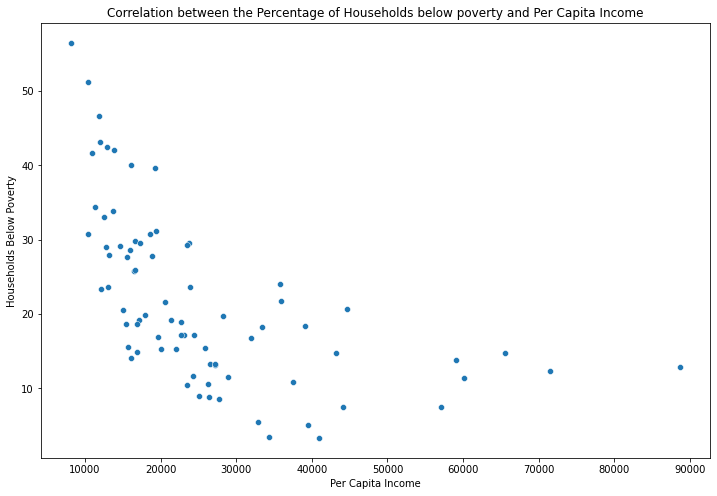

In [40]:
# Relationship between per_capita_income_ and percent_households_below_poverty
income_vs_households_below_poverty  = %sql SELECT per_capita_income_, percent_households_below_poverty FROM CHICAGO_DATA;

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_households_below_poverty.DataFrame())
ax.set(xlabel='Per Capita Income', ylabel='Households Below Poverty', title='Correlation between the Percentage of Households below poverty and Per Capita Income')
plt.show()